<a href="https://colab.research.google.com/github/JonNData/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Jon_LS_DS12_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [0]:
# TODO - code!
drunk_iteration = []
def p_drunk_given_pos(p_drunk_prior, false_pos_rate):
  
  p_pos_drunk = 1
  p_not_drunk = 1 - p_drunk_prior
  prob_drunk = (p_pos_drunk * p_drunk_prior) / ((p_pos_drunk * p_drunk_prior) +(false_pos_rate * p_not_drunk))
  print('The probability that the subject is drunk given a positive result is:',
        prob_drunk)
  drunk_iteration.append(prob_drunk)
  

  

In [47]:
p_drunk_given_pos(1/1000,.08)
# One positive test gives us a 12.36% chance of drunkenness

The probability that the subject is drunk given a positive result is: 0.012357884330202669


In [48]:
drunk_iteration

[0.012357884330202669]

In [49]:
p_drunk_given_pos(0.012357884330202669,.08)
# After two tests it raises to 13.53%

The probability that the subject is drunk given a positive result is: 0.13525210993291495


In [50]:
p_drunk_given_pos(0.13525210993291495,.08)

The probability that the subject is drunk given a positive result is: 0.6615996951348605


In [51]:
p_drunk_given_pos(0.6615996951348605,.08)
# It takes 4 tests for a >95% probability of intoxication given a positive

The probability that the subject is drunk given a positive result is: 0.9606895076105054


In [52]:
drunk_iteration

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054]

In [79]:
## 2) Explore scipy.stats.bayes_mvs
weighted_coinflips = np.random.binomial(n=1, p=.3, size = 60)
bayesian_mean, var, stdev = stats.bayes_mvs(weighted_coinflips)
bayesian_mean



Mean(statistic=0.35, minmax=(0.24623155160691523, 0.45376844839308467))

In [0]:
bayesian_CI = [bayesian_mean[0], bayesian_mean[1][0], bayesian_mean[1][1]]


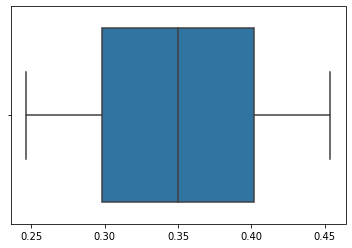

In [81]:
# Plot bayesian
ax = sns.boxplot(bayesian_CI)

(0.35, 0.2462315516069153, 0.45376844839308467)


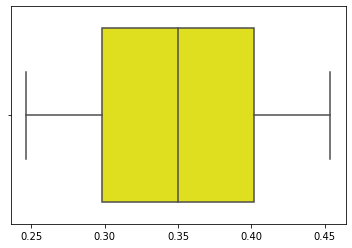

In [123]:
# Plot frequentist
def freq_CI(data, confidence=0.9):
  n = len(data)
  mean = sum(data)/n
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1+ confidence)/2.0 , n-1)
  return (mean, mean-interval, mean + interval)

print(freq_CI(weighted_coinflips))

sns.boxplot(freq_CI(weighted_coinflips),color='yellow')

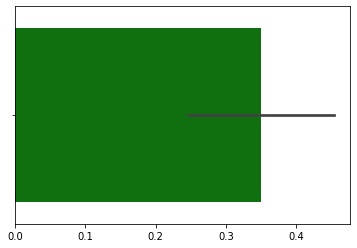

In [122]:
sns.barplot(bayesian_CI, color="green")
# Kinda just works on it's own


(-0.5, 1.5)

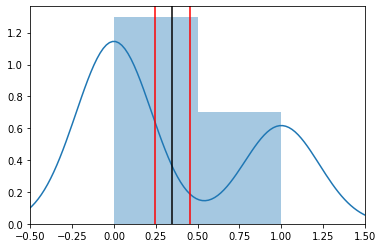

In [128]:
f_ci = freq_CI(weighted_coinflips)
sns.distplot(weighted_coinflips)
plt.axvline(x=f_ci[1], color='red')
plt.axvline(x=f_ci[2], color='red')
plt.axvline(x=f_ci[0], color='k');
plt.xlim(-.5,1.5)

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!